In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

In [2]:
import torch 
import torch.nn as nn

In [3]:
df = pd.read_csv("C:/Users/JAI KALYAN/Desktop/MRF.csv")
closed_prices = df["Adj Close"]

In [4]:
seq_len = 18

In [5]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [6]:
x = []
y =[]

In [7]:
for i in range(len(scaled_price)-seq_len):
    x.append(scaled_price[i:i+seq_len])
    y.append(scaled_price[i+seq_len])

In [8]:
x = np.array(x)[... , None]
y = np.array(y)[... , None]

In [9]:
train_x = torch.from_numpy(x[:int(0.8* x.shape[0])]).float()
train_y = torch.from_numpy(y[:int(0.8* x.shape[0])]).float()
test_x = torch.from_numpy(x[int(0.8* x.shape[0]):]).float()
test_y = torch.from_numpy(y[int(0.8* x.shape[0]):]).float()

In [10]:
class Model(nn.Module):
     def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
     def forward(self , x):
        output , (hidden , cell) = self.lstm(x)
        return self.fc(hidden[-1 , :])

In [11]:
model = Model(1, 120)

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [13]:
loss_fn = nn.MSELoss()

In [14]:
num_epochs = 100

In [15]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 ==0 and epoch != 1:
     print(epoch, "epoch loss" , loss.detach().numpy())

0 epoch loss 0.122683294
10 epoch loss 0.023135945
20 epoch loss 0.020492585
30 epoch loss 0.018573387
40 epoch loss 0.01395642
50 epoch loss 0.005332672
60 epoch loss 0.0036126312
70 epoch loss 0.0023551667
80 epoch loss 0.0019518235
90 epoch loss 0.0017979501


In [16]:
model.eval()
with torch.no_grad():
    output = model(test_x)

In [17]:
pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_y.numpy())    

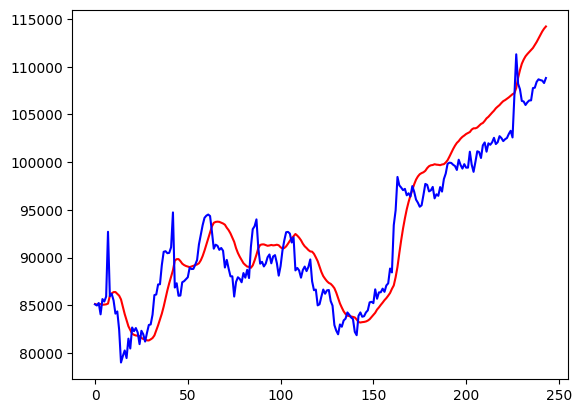

In [18]:
plt.plot(pred.squeeze() , color = "red", label = "predicted")
plt.plot(real.squeeze() , color = "blue", label = "real")
plt.show()